# Regression Model 2

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from math import sin, cos, sqrt, atan2, radians
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.decomposition import PCA
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization

In [3]:
train = pd.read_csv('new_train.csv')
test = pd.read_csv('new_test.csv')

print('Train set', train.shape)
print('Test set', test.shape)

Train set (1458640, 26)
Test set (625134, 24)


In [16]:
X = train.drop(['trip_duration', 'log_trip_duration'], axis = 1)
y = train['log_trip_duration']

## Bayesian Optimization with CV

In [50]:
dtrain = lgb.Dataset(data = X, label = y, categorical_feature = X.select_dtypes(np.int64).columns.tolist(), free_raw_data = False)

def lgbm_cv(learning_rate, n_estimators, max_depth, num_leaves, subsample, min_data_in_leaf):
    params = {'learning_rate': learning_rate,
              'n_estimators': int(n_estimators),
              'max_depth': int(max_depth),
              'num_leaves': int(num_leaves),
              'subsample': subsample,
              'min_data_in_leaf': int(min_data_in_leaf),
              'objective': 'regression',
              'force_col_wise': True}
    
    n_folds = 5
    
    print('\n %d-Fold CV' % n_folds)
    
    lgbcv = lgb.cv(params,
                    dtrain,
                    num_boost_round = 100,
                    shuffle = True,
                    stratified = False,
                    nfold = n_folds,
                    early_stopping_rounds = 100,
                    metrics = 'rmse',
                    verbose_eval = 100)
    return (-1*np.array(lgbcv['rmse-mean'])).max()

In [51]:
pbounds = {'learning_rate': (0.005, 0.1),
              'n_estimators': (1000, 2000),
              'max_depth': (10, 20),
              'num_leaves': (7, 21),
              'subsample': (0.5, 0.9),
              'min_data_in_leaf': (5, 20)}

lgbBO = BayesianOptimization(lgbm_cv, pbounds = pbounds, random_state = 0)

In [52]:
lgbBO.maximize(init_points = 3, n_iter = 10, acq = 'ei')

|   iter    |  target   | learni... | max_depth | min_da... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------

 5-Fold CV
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Start training from score 6.467055
[LightGBM] [Info] Start training from score 6.466922
[LightGBM] [Info] Start training from sco

[1300]	cv_agg's rmse: 0.396853 + 0.00228255
[1400]	cv_agg's rmse: 0.396557 + 0.00226484
|  5        | -0.3964   |  0.09923  |  13.0     |  8.308    |  1.45e+03 |  13.34    |  0.7664   |

 5-Fold CV
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Start training from score 6.467055
[LightGBM] [Info] Start training from score 6.466922
[LightGBM] [Info] Start training from score 6.46708

[400]	cv_agg's rmse: 0.408528 + 0.00226668
[500]	cv_agg's rmse: 0.406616 + 0.00226941
[600]	cv_agg's rmse: 0.405122 + 0.00227941
[700]	cv_agg's rmse: 0.403948 + 0.00234339
[800]	cv_agg's rmse: 0.402915 + 0.0024334
[900]	cv_agg's rmse: 0.402047 + 0.00242573
[1000]	cv_agg's rmse: 0.401324 + 0.00243749
[1100]	cv_agg's rmse: 0.400695 + 0.00245923
[1200]	cv_agg's rmse: 0.400142 + 0.00245277
[1300]	cv_agg's rmse: 0.39964 + 0.00245829
[1400]	cv_agg's rmse: 0.39921 + 0.00245961
[1500]	cv_agg's rmse: 0.398788 + 0.00248674
[1600]	cv_agg's rmse: 0.398435 + 0.00245124
|  10       | -0.3983   |  0.06524  |  11.65    |  10.61    |  1.634e+0 |  11.09    |  0.6605   |

 5-Fold CV
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 1166912, number of used features: 24
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data po

KeyboardInterrupt: 

### Get optimal parameter

In [63]:
print('Optimal parameters: \n', lgbBO.max['params'])
opt_params = lgbBO.max['params']

Optimal parameters: 
 {'learning_rate': 0.09570083800987657, 'max_depth': 10.357107399263338, 'min_data_in_leaf': 5.452992364979821, 'n_estimators': 1448.338377701042, 'num_leaves': 15.199836686405948, 'subsample': 0.5706440303766227}


## LGBMRegressor with optimal parameter

In [73]:
class KFoldModel(object):
    def __init__(self, n_splits, model):
        self.n_splits = n_splits
        self.model = model
        
    def prediction(self, X, y, early_stopping):
        folds = list(KFold(n_splits = self.n_splits, shuffle = True, random_state = 0).split(X, y))
        
        fold_rmsle = []
        for i, (train_idx, val_idx) in enumerate(folds):
            X_train, X_val = X.iloc[train_idx, :], X.iloc[val_idx, :]
            y_train, y_val = y[train_idx], y[val_idx]
            
            if early_stopping:
                print('\n %s model: Fold %d' %(self.model.__class__.__name__, i+1))
                self.model.fit(X_train, y_train, eval_set = [(X_val, y_val)], eval_metric = 'rmse', 
                               early_stopping_rounds = 50)
            else:
                print('\n %s model: Fold %d' %(self.model.__class__.__name__, i+1))
                self.model.fit(X_train, y_train)
                
            y_val_pred = self.model.predict(X_val)
            rmsle = np.sqrt(mean_squared_error(y_val, y_val_pred))
            fold_rmsle.append(rmsle)
            print('Fold %d RMSLE: %.4f' %(i+1, rmsle))
        return fold_rmsle

In [75]:
params = {'learning_rate': opt_params['learning_rate'],
          'objective': 'regression',
          'n_estimators': int(np.round(opt_params['n_estimators'], 0)), 
          'max_depth': int(np.round(opt_params['max_depth'], 0)),
          'num_leaves': int(np.round(opt_params['num_leaves'], 0)),
          'min_data_in_leaf': int(np.round(opt_params['min_data_in_leaf'], 0)),
          'subsample': opt_params['subsample'],
          'force_col_wise': True,
          'verbose': -1
          }


lgbm_model = LGBMRegressor(**params)
models = KFoldModel(n_splits = 5, model = lgbm_model)
cv_result = models.prediction(X, y, early_stopping = False)


 LGBMRegressor model: Fold 1
Fold 1 RMSLE: 0.3994

 LGBMRegressor model: Fold 2
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
Fold 2 RMSLE: 0.3942

 LGBMRegressor model: Fold 3
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
Fold 3 RMSLE: 0.3926

 LGBMRegressor model: Fold 4
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
Fold 4 RMSLE: 0.3957

 LGBMRegressor model: Fold 5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
Fold 5 RMSLE: 0.3977


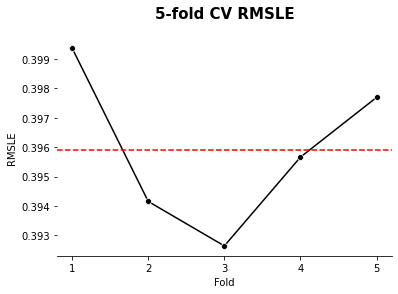

In [76]:
ax = sns.lineplot(range(1, 6), cv_result, marker = 'o', color = 'black')
plt.title('5-fold CV RMSLE', fontsize = 15, fontweight = 'bold', pad = 20)
plt.axhline(y = np.mean(cv_result), linestyle = '--', color = 'red')
plt.xticks([1, 2, 3, 4, 5]); plt.xlabel('Fold'); plt.ylabel('RMSLE')
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

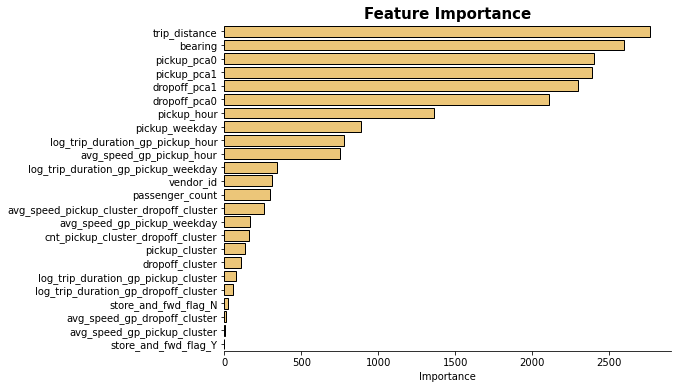

In [77]:
feat_imp = pd.DataFrame()
feat_imp['variable'] = X.columns.tolist()
feat_imp['importance'] = lgbm_model.feature_importances_
feat_imp = feat_imp.sort_values(by = 'importance', ascending = False)

plt.figure(figsize = (8, 6))
ax = sns.barplot(data = feat_imp, x = 'importance', y = 'variable', color = '#ffcc66', edgecolor = 'k')
plt.title('Feature Importance', fontsize = 15, fontweight = 'bold'); plt.ylabel(''); plt.xlabel('Importance')
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)